In [1]:
from sklearn.datasets import make_blobs
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Layer,Dense

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
X,y=make_blobs(centers=4,n_samples=10000,random_state=42)

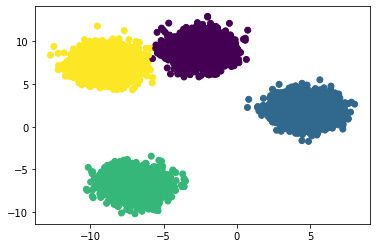

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
y_hot=OneHotEncoder().fit_transform(y.reshape(-1,1)).todense()

In [6]:
y_hot.shape

(10000, 4)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [8]:
model=Sequential()

In [9]:
model.add(Dense(units=5,input_shape=(2,),activation="sigmoid"))
model.add(Dense(units=4,activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 24        
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='rmsprop',
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [12]:
output=model.fit(X_train,y_train,epochs=10)

Train on 6700 samples
Epoch 1/10
6700/6700 [==============================] - 1s 107us/sample - loss: 1.0680 - accuracy: 0.6304
Epoch 2/10
6700/6700 [==============================] - 0s 32us/sample - loss: 0.7184 - accuracy: 0.9601
Epoch 3/10
6700/6700 [==============================] - 0s 37us/sample - loss: 0.5084 - accuracy: 0.9994
Epoch 4/10
6700/6700 [==============================] - 0s 36us/sample - loss: 0.3695 - accuracy: 0.9997
Epoch 5/10
6700/6700 [==============================] - 0s 37us/sample - loss: 0.2727 - accuracy: 0.9996
Epoch 6/10
6700/6700 [==============================] - 0s 40us/sample - loss: 0.2042 - accuracy: 0.9997
Epoch 7/10
6700/6700 [==============================] - 0s 38us/sample - loss: 0.1557 - accuracy: 0.9997
Epoch 8/10
6700/6700 [==============================] - 0s 42us/sample - loss: 0.1206 - accuracy: 0.9997
Epoch 9/10
6700/6700 [==============================] - 0s 34us/sample - loss: 0.0948 - accuracy: 0.9997
Epoch 10/10
6700/6700 [=========

In [13]:
model.predict(X_test[:10]).argmax(axis=1)

array([1, 1, 1, 2, 3, 1, 3, 1, 1, 1], dtype=int64)

In [14]:
model.predict(X_test[:1]).argmax(axis=1)

array([1], dtype=int64)

In [15]:
y_test[:1].argmax(axis=1)

matrix([[1]], dtype=int64)

In [16]:
from keras.layers import Layer,Dense
from keras.models import Sequential

Using TensorFlow backend.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [18]:
data=np.load("../../thirtyfive/datasets/mnist/mnist_train_small.npy")

In [19]:
X,y=data[:,1:],data[:,0]

In [20]:
X.shape

(19999, 784)

In [21]:
y_hot=OneHotEncoder().fit_transform(y.reshape(-1,1)).todense()

In [22]:
y_hot.shape

(19999, 10)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [24]:
model=Sequential()

In [25]:
model.add(Dense(100,input_shape=(784,),activation="sigmoid",name="L1"))
model.add(Dense(50,activation="sigmoid",name="L2"))
model.add(Dense(30,activation="sigmoid",name="L3"))
model.add(Dense(10,activation="softmax",name="O1"))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 100)               78500     
_________________________________________________________________
L2 (Dense)                   (None, 50)                5050      
_________________________________________________________________
L3 (Dense)                   (None, 30)                1530      
_________________________________________________________________
O1 (Dense)                   (None, 10)                310       
Total params: 85,390
Trainable params: 85,390
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [28]:
output=model.fit(X_train,y_train,epochs=10)

Epoch 1/10
13399/13399 [==============================] - 1s 86us/step - loss: 1.6803 - accuracy: 0.5624
Epoch 2/10
13399/13399 [==============================] - 1s 73us/step - loss: 0.7970 - accuracy: 0.8189
Epoch 3/10
13399/13399 [==============================] - 1s 68us/step - loss: 0.5622 - accuracy: 0.8565
Epoch 4/10
13399/13399 [==============================] - 1s 66us/step - loss: 0.4600 - accuracy: 0.8714
Epoch 5/10
13399/13399 [==============================] - 1s 64us/step - loss: 0.4348 - accuracy: 0.8751
Epoch 6/10
13399/13399 [==============================] - 1s 75us/step - loss: 0.4369 - accuracy: 0.8708
Epoch 7/10
13399/13399 [==============================] - 1s 73us/step - loss: 0.4049 - accuracy: 0.8772
Epoch 8/10
13399/13399 [==============================] - 1s 63us/step - loss: 0.3967 - accuracy: 0.8792
Epoch 9/10
13399/13399 [==============================] - 1s 64us/step - loss: 0.3826 - accuracy: 0.8817
Epoch 10/10
13399/13399 [==============================

In [29]:
plt.style.use("seaborn")

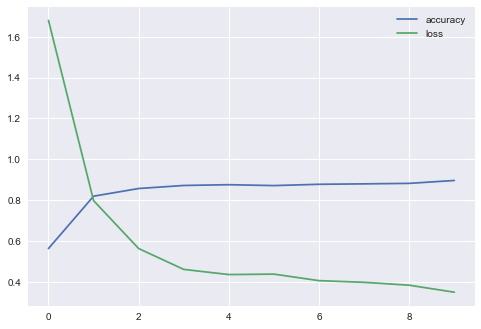

In [30]:
plt.figure()
plt.plot(output.history["accuracy"],label="accuracy")
plt.plot(output.history["loss"],label="loss")
plt.legend()
plt.show()

In [31]:
model.predict(X_test[:10]).argmax(axis=1)

array([8, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=int64)

In [32]:
y_test[:10].argmax(axis=1).flatten()

matrix([[7, 7, 0, 9, 4, 5, 4, 6, 9, 2]], dtype=int64)

In [33]:
model.predict(X_test[1:2]).argmax(axis=1)

array([7], dtype=int64)

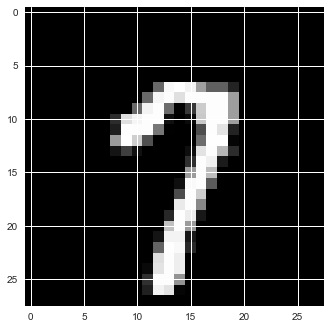

In [34]:
plt.imshow(X_test[1:2].reshape(28,28),cmap="gray")

In [35]:
from PIL import Image

In [71]:
img=Image.open("../../thirtyfive/datasets/nums/eight.jpeg")
im=img.resize(size=(28,28))
image= 255 - np.array(im).mean(axis=2)

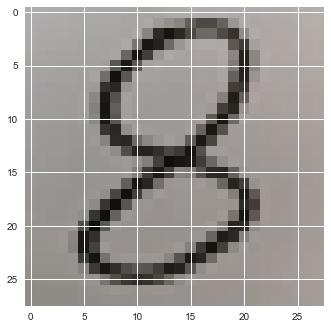

In [72]:
plt.imshow(im,cmap="gray")

In [60]:
model.predict(np.array([image.flatten()])).argsort(axis=1)

array([[4, 9, 5, 1, 6, 7, 0, 8, 3, 2]], dtype=int64)

In [61]:
model.predict(np.array([image.flatten()])).argmax(axis=1)

array([2], dtype=int64)

interconected networks

In [131]:
from tensorflow.keras.layers import Layer,Input,Dense,Flatten
from tensorflow.keras.models import Model

In [137]:
in_layer=Input(shape=(784,))
d1=Dense(units=100,activation="sigmoid")(in_layer)
d2=Dense(units=50,activation="sigmoid")(d1)
out=Dense(units=10,activation="softmax")(d2)

In [138]:
model=Model(inputs=in_layer,outputs=out)

In [139]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [140]:
output=model.fit(X_train,y_train,epochs=10)

Train on 13399 samples
Epoch 1/10
13399/13399 [==============================] - 1s 82us/sample - loss: 1.2058 - accuracy: 0.7181
Epoch 2/10
13399/13399 [==============================] - 1s 56us/sample - loss: 0.5605 - accuracy: 0.8654
Epoch 3/10
13399/13399 [==============================] - 1s 54us/sample - loss: 0.4507 - accuracy: 0.8800
Epoch 4/10
13399/13399 [==============================] - 1s 59us/sample - loss: 0.3948 - accuracy: 0.8882
Epoch 5/10
13399/13399 [==============================] - 1s 56us/sample - loss: 0.3765 - accuracy: 0.8910
Epoch 6/10
13399/13399 [==============================] - 1s 57us/sample - loss: 0.3511 - accuracy: 0.8962
Epoch 7/10
13399/13399 [==============================] - 1s 55us/sample - loss: 0.3557 - accuracy: 0.8930
Epoch 8/10
13399/13399 [==============================] - 1s 57us/sample - loss: 0.3443 - accuracy: 0.8956
Epoch 9/10
13399/13399 [==============================] - 1s 60us/sample - loss: 0.3155 - accuracy: 0.9048
Epoch 10/10
13

In [141]:
model.predict(X_test[:10]).argmax(axis=1)

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=int64)

In [142]:
y_test[:10].argmax(axis=1).flatten()

matrix([[7, 7, 0, 9, 4, 5, 4, 6, 9, 2]], dtype=int64)

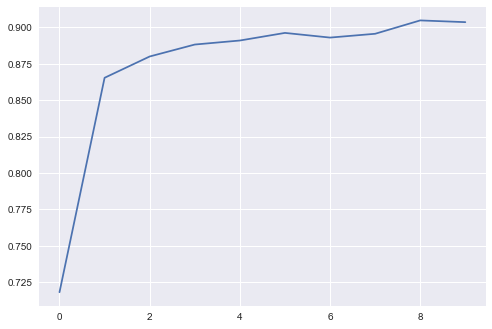

In [143]:
plt.plot(output.history["accuracy"])

keras dataset mnist

In [217]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [218]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [219]:
x_train.shape

(60000, 28, 28)

In [220]:
y_train.shape

(60000,)

In [221]:
in_layer=Input(shape=(28,28))
flat=Flatten()(in_layer)
d1=Dense(units=200,activation="sigmoid")(flat)
d2=Dense(units=100,activation="sigmoid")(d1)
d3=Dense(units=50,activation="relu")(d2)
out=Dense(units=10,activation="softmax")(d3)

In [222]:
m2=Model(inputs=in_layer,outputs=out)

In [223]:
m2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [224]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

### For categotical we have to convert y into categorical which can be done any of the two methods above and below

In [225]:
#y_train=OneHotEncoder().fit_transform(y_train.reshape(-1,1)).todense()
#y_test=OneHotEncoder().fit_transform(y_test.reshape(-1,1)).todense()

In [226]:
#y_train

In [227]:
y_train.shape

(60000, 10)

In [228]:
output=m2.fit(x_train,y_train,epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4970 - accuracy: 0.8546
Epoch 2/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3352 - accuracy: 0.8972
Epoch 3/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3023 - accuracy: 0.9052
Epoch 4/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2720 - accuracy: 0.9154
Epoch 5/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2516 - accuracy: 0.9204
Epoch 6/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2325 - accuracy: 0.9266
Epoch 7/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2123 - accuracy: 0.9332
Epoch 8/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2141 - accuracy: 0.9324
Epoch 9/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1949 - accuracy: 0.9380
Epoch 10/20
60

In [229]:
m2.evaluate(x_test,y_test,verbose=0)

[0.1427058795724064, 0.9535]

In [232]:
m2.predict(x_test[:10]).argmax(axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [234]:
y_test[:10].argmax(axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [263]:
data=Image.open("../../thirtyfive/datasets/nums/seven.jpeg")
img=data.resize(size=(28,28))
image=255-np.array(img).mean(axis=2)

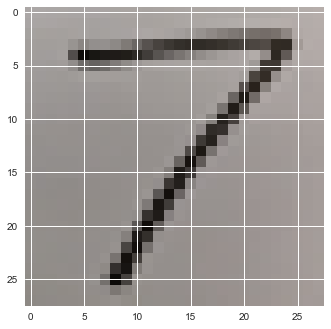

In [264]:
plt.imshow(img)

In [266]:
m2.predict(np.array([image])).argmax(axis=1)

array([2], dtype=int64)